#                        Traditional Hypothesis Tests
##                             And How to Run Them in Python

Below you will find examples of the traditional hypothesis tests and analyses typically taught in an Intro Stat course.  Each cell is self-contained, which means that I reload the modules necessary for each test over and over again.  However, it also means that you can simply copy & paste an entire cell when you try to replicate something that is demonstrated here.  

This is just a guide with some code for you to copy.  No explanations are given here.

In [1]:
from datascience import *
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Need some data to use in examples

births = Table.read_table('baby.csv')
counties = Table.read_table('counties.csv')
crime = Table.read_table('crime_rates.csv')

# Two Sample T-test

Used to compare means of two samples.

Accepts directed alternatives.  

In [2]:
# Two Sample T-test

group1 = births.where("Maternal Smoker", True).column("Birth Weight")
group2 = births.where("Maternal Smoker", False).column("Birth Weight")

Results = scipy.stats.ttest_ind(group1, group2, equal_var = False)  # Default is two-tailed test

# For a directed alternative, uncomment the one below with the correct direction.

#Results = scipy.stats.ttest_ind(group1, group2, equal_var = False, alternative ="greater")

#Results = scipy.stats.ttest_ind(group1, group2, equal_var = False, alternative ="less")

print("Results of 2-Sample T-test")

print(f"The test statistic is t = {Results[0]}, and p-value = {Results[1]}.")


Results of 2-Sample T-test
The test statistic is t = -8.626464445756927, and p-value = 2.6564639952299482e-17.


# Matched Pairs T-test

Used to look for differences when sampling the same group twice.

Accepts a directed alternative.

In [3]:
# Matched Pairs T-test

GA = crime.where("State", "Georgia").sort("Year").column("Murder Rate")  ## In this example
AL = crime.where("State", "Alabama").sort("Year").column("Murder Rate")  ## they are matched by year

import scipy.stats
Results = scipy.stats.ttest_rel(GA, AL)  # Change to groups defined above

# For a directed alternative, uncomment the one below with the correct direction.

#Results = scipy.stats.ttest_rel(GA, AL, alternative = "greater")

#Results = scipy.stats.ttest_rel(GA, AL, alternative = "less")


print("Results of Matched Pairs T-test")

print(f"The test statistic is t = {Results[0]}, and p-value = {Results[1]}.")

Results of Matched Pairs T-test
The test statistic is t = 1.8652219662926406, and p-value = 0.06898323125568474.


# Chi-squared test for Independence

Used to look for associations between categorical data.  Data must be arranged in an array, as a two-way table.  

Suppose you wanted to run a $\chi^2$ test for independence on this table:
 
 <table> 
    <tr>
        <th>14 </th>
        <th>2 </th>
    </tr>
    <tr>
        <th>6 </th>
        <th>9 </th>
    </tr>
        </table>
 

In [4]:
# Chi-squared test for independence
import numpy as np
obs = np.array([[14, 2], [6,9]])  # Put data into array structure

import scipy.stats
Results = scipy.stats.chi2_contingency(obs)

## Don't change anything below this line

print("Chi-Square = ", Results[0])
print("p-value = ", Results[1])
print("degrees of freedom = ", Results[2])
print("Expected Table = ")
print(Results[3])

print("Reminder: No zero cells, and not more than 20% with counts below 5 in Expected Table.")



Chi-Square =  5.696396780303031
p-value =  0.016999777502603477
degrees of freedom =  1
Expected Table = 
[[10.32258065  5.67741935]
 [ 9.67741935  5.32258065]]
Reminder: No zero cells, and not more than 20% with counts below 5 in Expected Table.


# Chi-squared Test for Goodness-of-Fit

Used to test is sample counts fit an expected count based on assumed population proportions.  


In [5]:
# Chi-squared goodness-of-fit

obs_counts = make_array(24, 20, 18, 5, 7, 1)  # Test is expecting COUNTS!
total = sum(obs_counts)

pred_counts = make_array(.24, .20, .15, .13, .13, .05)*total  # Turn proportions into COUNTS!

import scipy.stats
Results = scipy.stats.chisquare(obs_counts, pred_counts)

print("Results of Chi-squared GoF Test")

print(f"The test statistic is Chi^2 = {Results[0]}, and p-value = {Results[1]}.")


Results of Chi-squared GoF Test
The test statistic is Chi^2 = 12.823076923076922, and p-value = 0.025094358777833156.


# Binomial Test

Used to test for differences in proportions with two groups.

To run this test, you designate one group "success" and count successes as well as trials.  

Accepts a directed alternative.

In [6]:
import scipy.stats

successes = 150

trials = 200

null_probability = 0.7

pval = scipy.stats.binom_test(successes, trials, null_probability)

# For a directed alternative, uncomment the one below with the correct direction.

#pval = scipy.stats.binom_test(successes, trials, null_probability, alternative = "greater")

#pval = scipy.stats.binom_test(successes, trials, null_probability, alternative = "less")


print(f"Binomial Test Results: The p-value = {pval}")

Binomial Test Results: The p-value = 0.14233173709397484


# Correlation and Linear Regression


In [7]:
# Correlation

mom_weight = births.column("Maternal Pregnancy Weight")  # Make two arrays of numbers
baby_weight = births.column("Birth Weight")              # one for x and one for y

import scipy.stats
Results = scipy.stats.pearsonr(mom_weight, baby_weight)

print(f"Correlation = {Results[0]}")

Correlation = 0.15592327018706933


In [8]:
# Linear Regression

mom_weight = births.column("Maternal Pregnancy Weight")  # Make two arrays of numbers
baby_weight = births.column("Birth Weight")              # one for x and one for y

import scipy.stats
Results = scipy.stats.linregress(mom_weight, baby_weight)

print(f"Intercept = {Results[1]} and slope = {Results[0]}")
print(f"P-value for Slope ={Results[3]}")
print(f"Correlation = {Results[2]}")

Intercept = 101.75392786147968 and slope = 0.1378329069747063
P-value for Slope =7.887284473933167e-08
Correlation = 0.15592327018706933


A scatterplot featuring the linear regression line is often included with linear regression analysis. 

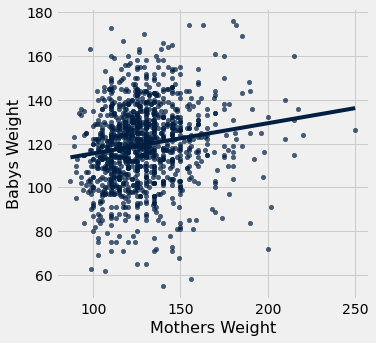

In [9]:
mom_weight = births.column("Maternal Pregnancy Weight")  # Make two arrays of numbers
baby_weight = births.column("Birth Weight")              # one for x and one for y

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from datascience import *

Weights = Table().with_columns("Mothers Weight", mom_weight, "Babys Weight", baby_weight)

Weights.scatter("Mothers Weight", fit_line=True)

# One Sample T-test

Used to compare the mean of a single sample to an assumed population mean.

In [10]:
# One Sample T-test

sample = births.column("Birth Weight")
null_mean = 120

import scipy.stats
Results = scipy.stats.ttest_1samp(sample, null_mean)

# For a directed alternative uncomment the appropriate line below

#Results = scipy.stats.ttest_1samp(sample, null_mean, alternative ="greater")

#Results = scipy.stats.ttest_1samp(sample, null_mean, alternative ="less")

print("Results of 1-Sample T-test")
print(f"The test statistic is t = {Results[0]}, and p-value = {Results[1]}.")



Results of 1-Sample T-test
The test statistic is t = -1.004764597798588, and p-value = 0.31521743438725197.
